In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
#df=pd.read_parquet('../data/interim/PurpleAir MASTER realtime individual.parquet').drop(columns=['entry_id'])
df=pd.read_parquet('../data/processed/PurpleAir daily individual.parquet')

In [4]:
df

PM1.0_CF1_ug/m3  PM2.5_CF1_ug/m3  \
sensor_name created_at                                                    
PA_II_0D9C  2019-12-31 00:00:00-06:00         8.876592        12.271173   
            2020-01-01 00:00:00-06:00         9.148278        13.834861   
            2020-01-02 00:00:00-06:00        12.859681        20.693389   
            2020-01-03 00:00:00-06:00         2.121110         2.978492   
            2020-01-04 00:00:00-06:00         1.652295         2.262434   
...                                                ...              ...   
PA_II_E6D8  2020-09-04 00:00:00-05:00         3.964375         6.409000   
            2020-09-05 00:00:00-05:00         5.933181         8.936069   
            2020-09-07 00:00:00-05:00         6.048111         8.835569   
            2020-09-08 00:00:00-05:00         4.079221         6.423143   
            2020-09-10 00:00:00-05:00         3.272667         4.735208   

                                       PM10.0_CF1_ug/m3  UptimeMinutes  \
sensor_name created_at                                                   
PA_II_0D9C  2019-12-31 00:00:00-06:00         12.908045   36215.145251   
            2020-01-01 00:00:00-06:00         14.895097   37115.000000   
            2020-01-02 00:00:00-06:00         22.503903   38555.000000   
            2020-01-03 00:00:00-06:00          3.166046   40009.802276   
            2020-01-04 00:00:00-06:00          2.403213   41433.216968   
...                                                 ...            ...   
PA_II_E6D8  2020-09-04 00:00:00-05:00          6.795750   16513.000000   
            2020-09-05 00:00:00-05:00          9.357306   17953.000000   
            2020-09-07 00:00:00-05:00          9.399889   20833.000000   
            2020-09-08 00:00:00-05:00          7.084172   22272.002782   
            2020-09-10 00:00:00-05:00          5.057264   25151.000000   

                                        RSSI_dbm  Temperature_F  Humidity_%  \
sensor_name created_at                                                        
PA_II_0D9C  2019-12-31 00:00:00-06:00 -48.807263      60.284916   24.033520   
            2020-01-01 00:00:00-06:00 -48.780556      59.916667   37.716667   
            2020-01-02 00:00:00-06:00 -48.769444      60.531944   61.901389   
            2020-01-03 00:00:00-06:00 -49.426743      61.540541   43.268848   
            2020-01-04 00:00:00-06:00 -48.796940      62.089013   30.201669   
...                                          ...            ...         ...   
PA_II_E6D8  2020-09-04 00:00:00-05:00 -73.640278      81.680556   65.525000   
            2020-09-05 00:00:00-05:00 -82.555556      85.808333   56.352778   
            2020-09-07 00:00:00-05:00 -72.381944      92.726389   42.416667   
            2020-09-08 00:00:00-05:00 -72.756606      87.136300   55.574409   
            2020-09-10 00:00:00-05:00 -62.401389      68.668056   61.930556   

                                       Channel A PM2.5 (ug/m3)       lat  \
sensor_name created_at                                                     
PA_II_0D9C  2019-12-31 00:00:00-06:00                12.271173  30.28559   
            2020-01-01 00:00:00-06:00                13.821972  30.28559   
            2020-01-02 00:00:00-06:00                20.649250  30.28559   
            2020-01-03 00:00:00-06:00                 2.978492  30.28559   
            2020-01-04 00:00:00-06:00                 2.262434  30.28559   
...                                                        ...       ...   
PA_II_E6D8  2020-09-04 00:00:00-05:00                 6.403319  30.28941   
            2020-09-05 00:00:00-05:00                 8.936028  30.28941   
            2020-09-07 00:00:00-05:00                 8.835569  30.28941   
            2020-09-08 00:00:00-05:00                 6.421599  30.28941   
            2020-09-10 00:00:00-05:00                 4.734222  30.28941   

                                             lon  Channel B PM2.5 (ug/m3)  
sensor_

In [5]:
df['Channel A PM2.5 (ug/m3)'].max()

37.316958333333304

In [6]:
features = ['UptimeMinutes','RSSI_dbm', 'Temperature_F', 'Humidity_%', 'PM2.5_ATM_ug/m3', 'lat','lon']

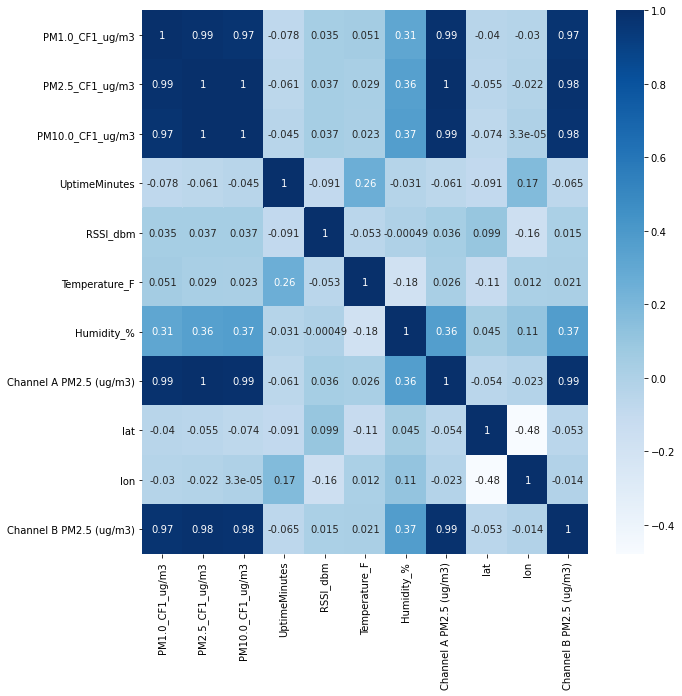

In [7]:

#https://datatofish.com/correlation-matrix-pandas/
corr_matrix = df.corr()
sn.heatmap(corr_matrix,annot=True,cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(10,10)

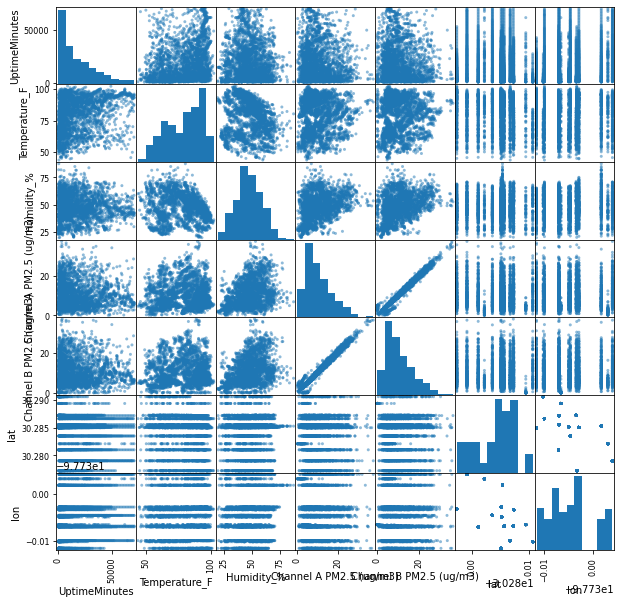

In [8]:
feat = ['UptimeMinutes', 'Temperature_F', 'Humidity_%', 'Channel A PM2.5 (ug/m3)','Channel B PM2.5 (ug/m3)','lat','lon']
scatter_matrix(df[feat])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show() 


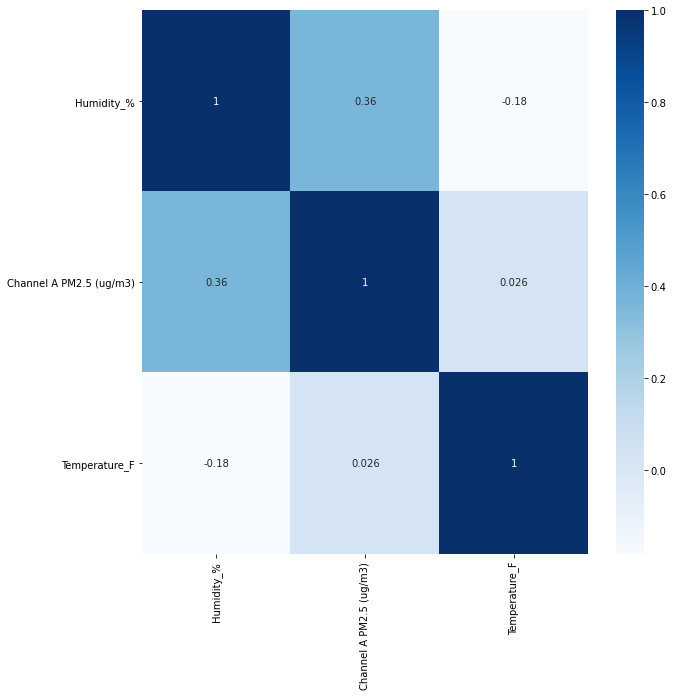

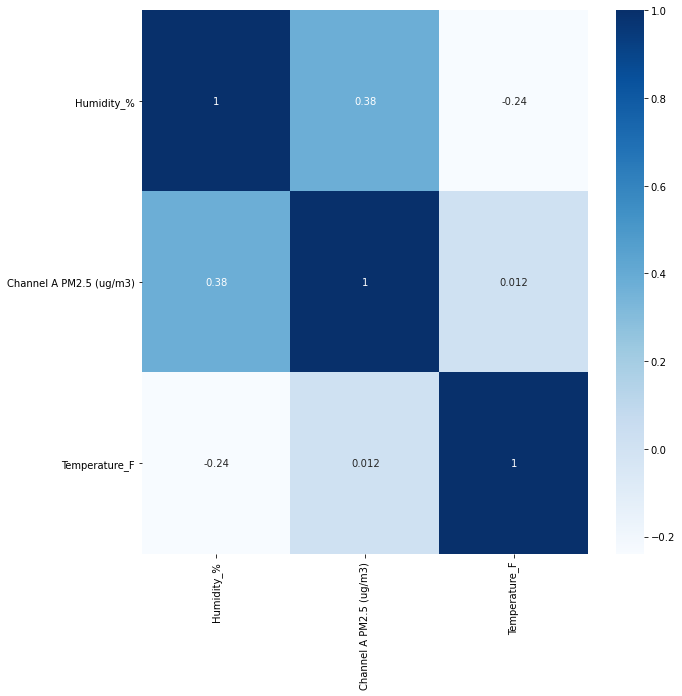

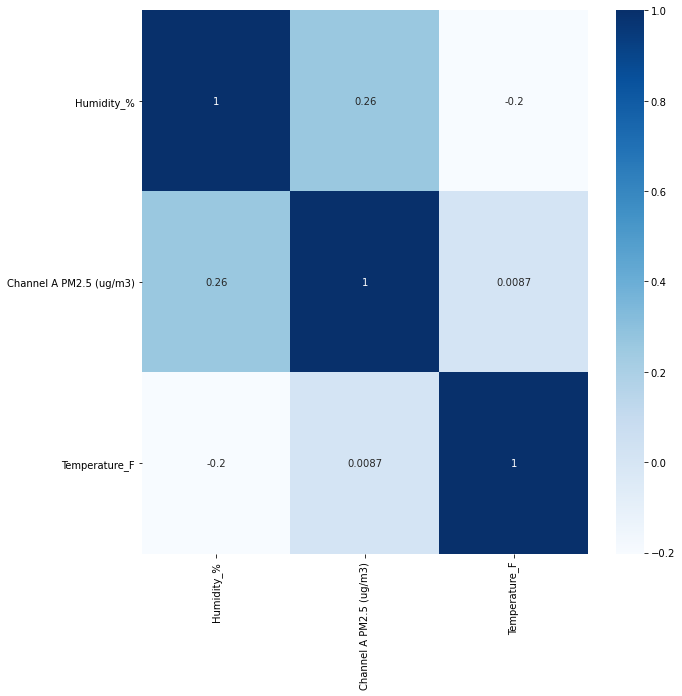

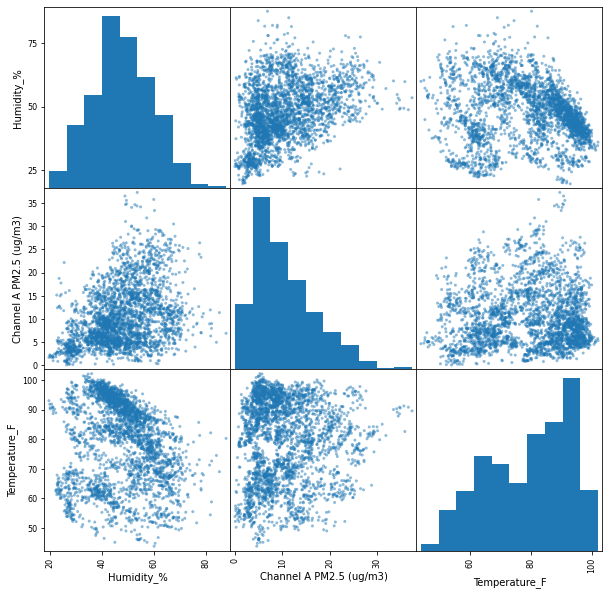

In [9]:
corr_matrix = df[['Humidity_%', 'Channel A PM2.5 (ug/m3)','Temperature_F']].corr()
sn.heatmap(corr_matrix,annot=True,cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(10,10)

fig = plt.figure()
corr_matrix = df[['Humidity_%', 'Channel A PM2.5 (ug/m3)','Temperature_F']].corr(method='spearman')
sn.heatmap(corr_matrix,annot=True,cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(10,10)

fig = plt.figure()
corr_matrix = df[['Humidity_%', 'Channel A PM2.5 (ug/m3)','Temperature_F']].corr(method = 'kendall')
sn.heatmap(corr_matrix,annot=True,cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(10,10)

scatter_matrix(df[['Humidity_%', 'Channel A PM2.5 (ug/m3)','Temperature_F']])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show() 